In [41]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
plt.rcParams["font.family"] = "Times New Roman"
plt.style.use('seaborn-whitegrid')
plt.style.use('seaborn-poster')
plt.style.use('seaborn-dark-palette')
plt.rcParams["mathtext.fontset"] = "cm"

In [10]:
data = pd.read_csv('../dataset/radar/radar_narr_combine.csv')

In [6]:
# from "samplingperiod" to "ordinal.date", from radar dataset
# from "year" to "visibility", from North American Regional Reanalysis (NARR) data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7025340 entries, 0 to 7025339
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   samplingperiod     object 
 1   radar_id           object 
 2   lon                float64
 3   lat                float64
 4   elev               float64
 5   hgt.agl            int64  
 6   linear_eta         float64
 7   cbrt_eta           float64
 8   u                  float64
 9   v                  float64
 10  clear              float64
 11  weather            float64
 12  ordinal.date       int64  
 13  year               int64  
 14  sunset             object 
 15  sunset.plus3       object 
 16  time               object 
 17  air                float64
 18  omega              float64
 19  uwind              float64
 20  vwind              float64
 21  albedo             float64
 22  acc.total.precip   float64
 23  cape               float64
 24  pressure.sfc       float64
 25  msl.pressure      

In [8]:
data

,samplingperiod,radar_id,lon,lat,elev,hgt.agl,linear_eta,cbrt_eta,u,v,...,vwind,albedo,acc.total.precip,cape,pressure.sfc,msl.pressure,relative.humidity,snow.cover,total.cloud.cover,visibility
0,1995-04-07,KAMX,-80.412778,25.611111,4.3,50,123.734000,4.983063,-1.619060,8.519440,...,1.298169,9.0,0.42888,725.0,101158.812500,101147.250,82.403633,0.0,66.5,18808.562500
1,1995-04-07,KAMX,-80.412778,25.611111,4.3,150,133.140000,5.106259,-1.021796,13.182800,...,1.771189,9.0,0.42888,725.0,101158.812500,101147.250,82.403633,0.0,66.5,18808.562500
2,1995-04-07,KAMX,-80.412778,25.611111,4.3,250,130.162000,5.067900,0.502240,14.292000,...,2.005215,9.0,0.42888,725.0,101158.812500,101147.250,82.403633,0.0,66.5,18808.562500
3,1995-04-07,KAMX,-80.412778,25.611111,4.3,350,81.778400,4.340564,3.013960,13.164400,...,2.177196,9.0,0.42888,725.0,101158.812500,101147.250,82.403633,0.0,66.5,18808.562500
4,1995-04-07,KAMX,-80.412778,25.611111,4.3,450,30.859000,3.136611,5.976500,10.733400,...,2.201200,9.0,0.42888,725.0,101158.812500,101147.250,82.403633,0.0,66.5,18808.562500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7025335,2017-05-31,KYUX,-114.656670,32.495278,53.0,2550,0.166340,0.549961,-6.050633,2.891500,...,4.585852,30.0,0.00000,0.0,99852.414062,100867.375,25.287952,0.0,7.5,20012.761719
7025336,2017-05-31,KYUX,-114.656670,32.495278,53.0,2650,0.441683,0.761559,-6.173967,3.219667,...,4.678981,30.0,0.00000,0.0,99852.414062,100867.375,25.287952,0.0,7.5,20012.761719
7025337,2017-05-31,KYUX,-114.656670,32.495278,53.0,2750,0.288477,0.660750,-6.310967,3.317433,...,4.772110,30.0,0.00000,0.0,99852.414062,100867.375,25.287952,0.0,7.5,20012.761719
7025338,2017-05-31,KYUX,-114.656670,32.495278,53.0,2850,0.224550,0.607814,-6.331600,3.519300,...,4.858119,30.0,0.00000,0.0,99852.414062,100867.375,25.287952,0.0,7.5,20012.761719


In [30]:
columns = ['hgt.agl', 
           'uwind', 
           'vwind', 
           'air', 
           'pressure.sfc', 
           'relative.humidity', 
           'lon', 
           'lat', 
           'ordinal.date', 
           'omega', 
           'total.cloud.cover', 
           'visibility', 
           'albedo', 
           'acc.total.precip',
           'msl.pressure',
           'cape',
           'snow.cover']

In [32]:
data.filtered = data[(data['clear'] > 0.7) & 
                     (data['uwind'] * data['uwind'] + data['vwind'] * data['vwind'] > 25)]
data.filtered = data.filtered[columns]
data.filtered

,hgt.agl,uwind,vwind,air,pressure.sfc,relative.humidity,lon,lat,ordinal.date,omega,total.cloud.cover,visibility,albedo,acc.total.precip,msl.pressure,cape,snow.cover
4,450,4.598680,2.201200,20.735392,101158.812500,82.403633,-80.412778,25.611111,97,0.170293,66.5,18808.562500,9.0,0.42888,101147.250,725.0,0.0
5,550,5.611253,2.207864,20.184990,101158.812500,82.403633,-80.412778,25.611111,97,0.172595,66.5,18808.562500,9.0,0.42888,101147.250,725.0,0.0
6,650,6.845441,1.836150,19.639618,101158.812500,82.403633,-80.412778,25.611111,97,0.175183,66.5,18808.562500,9.0,0.42888,101147.250,725.0,0.0
7,750,8.079630,1.464437,19.094246,101158.812500,82.403633,-80.412778,25.611111,97,0.177772,66.5,18808.562500,9.0,0.42888,101147.250,725.0,0.0
8,850,8.686853,1.235972,18.534090,101158.812500,82.403633,-80.412778,25.611111,97,0.170096,66.5,18808.562500,9.0,0.42888,101147.250,725.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7025335,2550,-3.833800,4.585852,13.204676,99852.414062,25.287952,-114.656670,32.495278,151,-0.129589,7.5,20012.761719,30.0,0.00000,100867.375,0.0,0.0
7025336,2650,-3.717864,4.678981,12.565155,99852.414062,25.287952,-114.656670,32.495278,151,-0.136911,7.5,20012.761719,30.0,0.00000,100867.375,0.0,0.0
7025337,2750,-3.601929,4.772110,11.925634,99852.414062,25.287952,-114.656670,32.495278,151,-0.144234,7.5,20012.761719,30.0,0.00000,100867.375,0.0,0.0
7025338,2850,-3.520237,4.858119,11.264534,99852.414062,25.287952,-114.656670,32.495278,151,-0.149950,7.5,20012.761719,30.0,0.00000,100867.375,0.0,0.0


In [55]:
#correlation.pearson = data.filtered.corr(method = "pearson")
def correlation_pearson(data, columns):
    correlation = data.corr(method = "pearson")
    plt.figure()
    sns.heatmap(data.corr(method = "pearson"), xticklabels = data.corr(method = "pearson").columns, 
                yticklabels = data.corr(method = "pearson").columns, cmap = 'RdYlGn', center = 0, annot = True)
    plt.title('Correlation pearson')
    plt.xticks(np.arange(17)+0.5, columns) 
    plt.yticks(np.arange(17)+0.5, columns) 
    plt.savefig('../figures/bird/correlation.png',dpi=300)
    plt.show()
    return correlation

In [56]:
def correlation_spearman(data, columns):
    correlation = data.corr(method = "spearman")
    plt.figure()
    sns.heatmap(data.corr(method = "spearman"), xticklabels = data.corr(method = "spearman").columns, 
                yticklabels = data.corr(method = "spearman").columns, cmap = 'RdYlGn', center = 0, annot = True)
    plt.title('Correlation Spearman')
    plt.xticks(np.arange(17)+0.5, columns) 
    plt.yticks(np.arange(17)+0.5, columns) 
    plt.savefig('../figures/bird/correlation_spearman.png',dpi=300)
    plt.show()
    return correlation

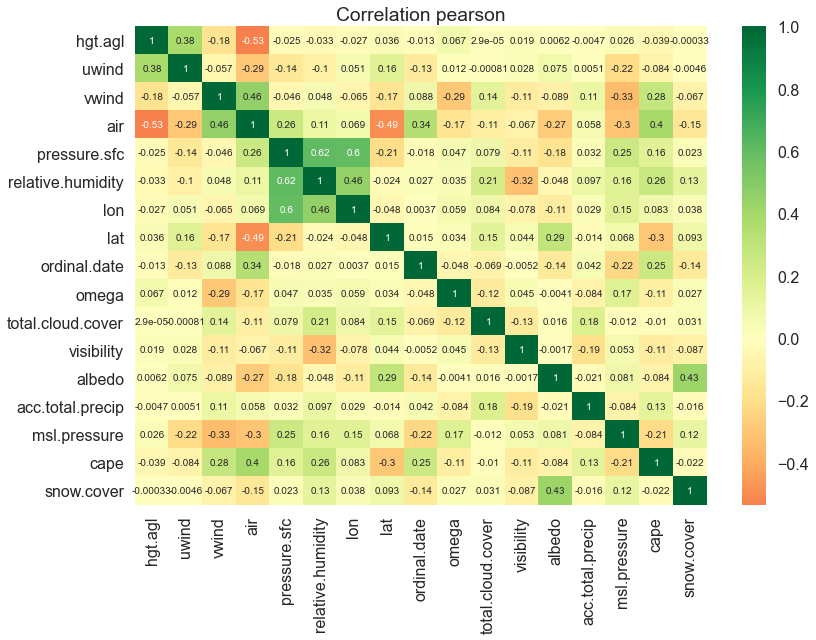

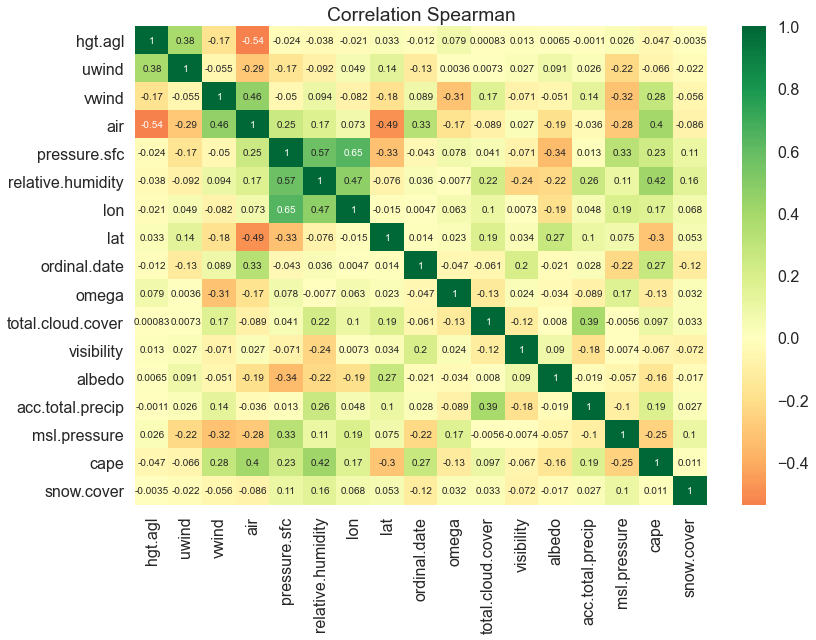

In [58]:
cor_pearson = correlation_pearson(data.filtered, columns)
cor_spearman = correlation_spearman(data.filtered, columns)